In [46]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import tensorflow as tf
import torchvision

In [ ]:
#pip install opencv-python

In [ ]:
#pip install torchvision

In [ ]:
import torchvision

In [ ]:
mypath = r"C:\Users\kavit\Downloads\garbage classification\garbage_classification\white-glass"

In [ ]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [ ]:
onlyfiles

In [ ]:
#pip install pycocotools


In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


In [3]:
#pip install tensorflow

In [4]:
import torch 
from torch.utils.data import Dataset 
from torch.utils.data import DataLoader 
  
# defining the Dataset class 
class data_set(Dataset): 
    def __init__(self): 
        numbers = list(range(0, 100, 1)) 
        self.data = numbers 
  
    def __len__(self): 
        return len(self.data) 
  
    def __getitem__(self, index): 
        return self.data[index] 
  
  
dataset = data_set() 
  
# implementing dataloader on the dataset and printing per batch 
dataloader = DataLoader(dataset, batch_size=10, shuffle=True) 
for i, batch in enumerate(dataloader): 
    print(i, batch) 

0 tensor([53, 39, 24, 57, 92, 48, 89, 22, 14, 36])
1 tensor([17, 68, 64, 52, 47, 97, 60, 70, 33, 25])
2 tensor([87, 78, 90, 61,  6, 79, 34, 55, 37, 35])
3 tensor([11, 84, 65, 81, 99, 10, 30, 49, 98, 58])
4 tensor([42, 82, 67, 77, 74, 59, 94, 32,  8, 88])
5 tensor([31, 46, 43,  0, 18,  4,  7, 38,  9, 80])
6 tensor([69, 27,  5, 54, 76,  2, 16, 56, 96, 71])
7 tensor([28, 26, 23, 29, 12, 72, 83, 21,  3, 20])
8 tensor([91, 15, 66, 44,  1, 40, 73, 63, 50, 86])
9 tensor([62, 51, 41, 85, 75, 95, 93, 13, 45, 19])


In [8]:
from torchvision import transforms, datasets

In [12]:
data_dir = r'C:\Users\kavit\Downloads\garbage classification\garbage_classification\\'


In [13]:
transform = transforms.Compose(
    [transforms.Resize(255),
     transforms.CenterCrop(224),
     transforms.ToTensor()])

In [25]:
full_dataset = datasets.ImageFolder(data_dir, 
                               transform=transform)

In [27]:
full_dataset

Dataset ImageFolder
    Number of datapoints: 15515
    Root location: C:\Users\kavit\Downloads\garbage classification\garbage_classification\\
    StandardTransform
Transform: Compose(
               Resize(size=255, interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(224, 224))
               ToTensor()
           )

In [26]:
dataloader = torch.utils.data.DataLoader(full_dataset,
                                         batch_size=32,
                                         shuffle=True)
 

In [17]:
images, labels = next(iter(dataloader))


In [18]:
print('Number of samples: ', len(images))
image = images[2][0] 

Number of samples:  32


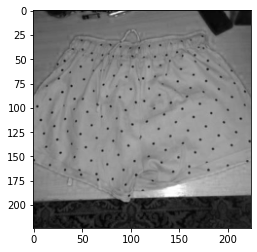

In [19]:
plt.imshow(image, cmap='gray')

In [24]:
labels[2]

tensor(4)

In [81]:
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size], generator=torch.Generator().manual_seed(42))

In [82]:
batch_size = 5

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [84]:
len(train_dataset)

12412

In [85]:
len(test_dataset)

3103

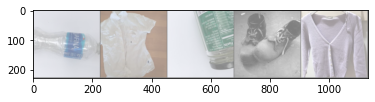

In [96]:


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels


In [97]:
labels

tensor([ 8,  4, 11,  9,  4])

In [94]:
full_dataset.class_to_idx

{'battery': 0,
 'biological': 1,
 'brown-glass': 2,
 'cardboard': 3,
 'clothes': 4,
 'green-glass': 5,
 'metal': 6,
 'paper': 7,
 'plastic': 8,
 'shoes': 9,
 'trash': 10,
 'white-glass': 11}

In [98]:
len(train_dataset)

12412

In [140]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(44944, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 12)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [141]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [143]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.261
[2,  2000] loss: 1.124
[3,  2000] loss: 1.026
[4,  2000] loss: 0.842
[5,  2000] loss: 0.715
Finished Training


In [113]:
net.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[-5.8434e-03, -8.6661e-02, -5.4177e-02,  3.0033e-02,  2.8919e-02],
                        [ 5.3296e-02, -6.7423e-02, -7.6992e-02, -8.7327e-02, -5.2731e-02],
                        [-4.7191e-02, -4.2012e-03, -8.8634e-02,  2.0665e-02,  2.6751e-02],
                        [-1.0141e-01,  3.2459e-02, -4.9209e-02, -2.6330e-02,  7.4842e-02],
                        [-8.7518e-03, -1.0824e-01, -7.5348e-02, -1.0754e-01, -7.3664e-02]],
              
                       [[ 5.6821e-02, -5.4972e-02,  1.0577e-01, -6.1900e-02, -4.7171e-02],
                        [-9.0014e-02, -4.5647e-02,  1.3504e-02, -1.7183e-02, -6.1175e-02],
                        [-7.1524e-02,  1.1122e-01, -8.1125e-02,  1.4025e-02,  2.7593e-02],
                        [-7.8853e-02,  7.1516e-02, -5.2480e-02,  4.6981e-02, -7.2068e-03],
                        [-1.0513e-01, -1.2058e-02, -1.1204e-01, -1.1241e-01,  6.0834e-03]],
              
                       [[ 5.

In [144]:
torch.save(net.state_dict(), 'garbage_classifier.pt')

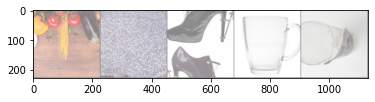

In [145]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))


In [146]:
net = Net()
net.load_state_dict(torch.load('garbage_classifier.pt'))

<All keys matched successfully>

In [147]:
full_dataset.class_to_idx

{'battery': 0,
 'biological': 1,
 'brown-glass': 2,
 'cardboard': 3,
 'clothes': 4,
 'green-glass': 5,
 'metal': 6,
 'paper': 7,
 'plastic': 8,
 'shoes': 9,
 'trash': 10,
 'white-glass': 11}

In [148]:
my_dict2 = {y: x for x, y in full_dataset.class_to_idx.items()}

In [149]:
my_dict2

{0: 'battery',
 1: 'biological',
 2: 'brown-glass',
 3: 'cardboard',
 4: 'clothes',
 5: 'green-glass',
 6: 'metal',
 7: 'paper',
 8: 'plastic',
 9: 'shoes',
 10: 'trash',
 11: 'white-glass'}

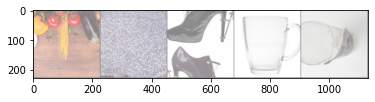

In [150]:
imshow(torchvision.utils.make_grid(images))


In [151]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{my_dict2[j]:5s}'
                              for j in range(5)))

Predicted:  battery biological brown-glass cardboard clothes


In [152]:
predicted

tensor([ 1,  4,  4, 11,  8])